In [1]:
import pandas as pd
from datetime import datetime, timedelta
import os
import random
import numpy as np
import datetime as dt

In [3]:
# sample_ids = []
# with open('matt.txt', 'r') as input_f:
#     lines = input_f.readlines()
#     for line in lines:
#         sample_ids.append(line.strip())

# Non TX Clinical Sample

In [2]:
non_tx_metadata = pd.read_csv('meta_non_tx.tsv', sep='\t', low_memory=False)

In [3]:
non_tx_metadata = non_tx_metadata.fillna('None')

In [4]:
non_tx_metadata = non_tx_metadata[(non_tx_metadata['Region'] != 'Texas') & ~((non_tx_metadata['Country'] == 'USA') & (non_tx_metadata['Region'] == 'None'))]

In [5]:
non_tx_metadata = non_tx_metadata[(non_tx_metadata['Country'] == 'USA')]

In [9]:
# with open("us_sampled_sra.txt", "w") as output_f:
#     for sra_id in non_tx_metadata['AccessionId'].to_list():
#         output_f.write(f"{sra_id}\n")

In [40]:
# non_tx_metadata.to_csv('metadata_non_tx.csv')

In [65]:
filtered_metadata = non_tx_metadata.copy()
filtered_metadata['Collection_Date'] = pd.to_datetime(filtered_metadata['Collected'], format='%m/%d/%Y')
filtered_metadata

start = filtered_metadata['Collection_Date'].min()
end = start

week_offset = dt.timedelta(days = 7)
sample_counts = []
x_ticklabels = []
while end <= filtered_metadata['Collection_Date'].max():
    #print(start, end)
    end = start + week_offset
    
    weekly_clinical_df = filtered_metadata[(filtered_metadata['Collection_Date'] >= start) & (filtered_metadata['Collection_Date'] < end)]
    weekly_sample_count = weekly_clinical_df.shape[0]
    
    x_ticklabels.append((start).strftime('%m-%d-%y'))
    sample_counts.append(weekly_sample_count)
    start = end
    
x_ticklabels.append((end).strftime('%m-%d-%y'))

Text(0.5, 1.0, 'Clinical Sample Count')

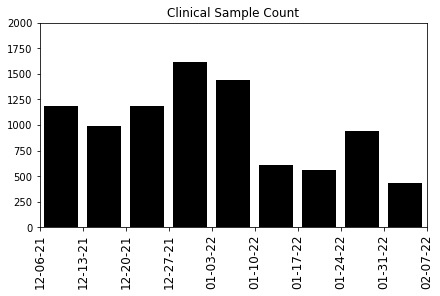

In [67]:
import matplotlib.pyplot as plt
import numpy as np

fontsize = 14
fig, ax  = plt.subplots(1, 1, figsize=(6, 4), sharex=True, constrained_layout=True)

x = np.arange(len(sample_counts))

ax.bar(x, sample_counts, color='black', alpha=1, width=0.8)

ax.set_ylim(0,2000)
ax.set_xlim(-0.5,len(sample_counts)-0.5)
ax.set_xticks(np.arange(len(sample_counts)+1)-0.5)
ax.set_xticklabels(x_ticklabels, rotation=90, fontsize=12)

ax.set_title('Clinical Sample Count')

In [72]:
region_df = pd.DataFrame(pd.pivot_table(non_tx_metadata, values='Repository', index='Region', aggfunc='count'))

In [74]:
region_df = region_df.rename({'Repository': 'Count'}, axis=1)

In [80]:
other_count = region_df['Count'].sum() - region_df[region_df['Count'] >= 70]['Count'].sum()
other_count

199

In [81]:
region_df[region_df['Count'] >= 70]

,Count
Region,
California,2808
Colorado,2067
Georgia,169
Maryland,285
Massachusetts,893
New Jersey,131
New Mexico,646
New York,182
North Carolina,94


In [94]:
region_df[region_df['Count'] >= 70]['Count'].to_list() + [other_count]

[2808, 2067, 169, 285, 893, 131, 646, 182, 94, 258, 70, 1167, 199]

In [97]:
selected_region_df.index.to_list() + ['Others']

['California',
 'Colorado',
 'Georgia',
 'Maryland',
 'Massachusetts',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'Pennsylvania',
 'Rhode Island',
 'Utah',
 'Others']

[Text(0, 0, 'California'),
 Text(1, 0, 'Colorado'),
 Text(2, 0, 'Georgia'),
 Text(3, 0, 'Maryland'),
 Text(4, 0, 'Massachusetts'),
 Text(5, 0, 'New Jersey'),
 Text(6, 0, 'New Mexico'),
 Text(7, 0, 'New York'),
 Text(8, 0, 'North Carolina'),
 Text(9, 0, 'Pennsylvania'),
 Text(10, 0, 'Rhode Island'),
 Text(11, 0, 'Utah'),
 Text(12, 0, 'Other 24 States')]

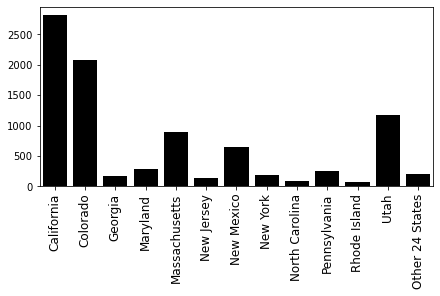

In [100]:
fontsize = 14
fig, ax  = plt.subplots(1, 1, figsize=(6, 4), sharex=True, constrained_layout=True)

selected_region_df = region_df[region_df['Count'] >= 70]
x = np.arange(selected_region_df.shape[0] + 1)

sample_counts = selected_region_df['Count'].to_list() + [other_count]
x_ticklabels = selected_region_df.index.to_list() + [f'Other {36-12} States']
ax.bar(x, sample_counts, color='black', alpha=1, width=0.8)

ax.set_xlim(-0.5,len(sample_counts)-0.5)
ax.set_xticks(np.arange(len(sample_counts)))
ax.set_xticklabels(x_ticklabels, rotation=90, fontsize=12)

In [45]:
# for idx, sample_id in enumerate(non_tx_metadata['AccessionId'].to_list()):
#     with open(os.path.join(f"/home/Users/yl181/cdc_harvest_variants/Proposed_Pipeline_SRA_Inputs_Quarc", f"hv_job_{idx}.in"), "w") as array_out:
#         array_out.write(sample_id)

# Texas Clinical Samples

In [3]:
metadata = pd.read_csv('PRJNA764181.SraRunTable.txt', low_memory=False)

In [4]:
metadata.columns

Index(['Run', 'Assay Type', 'AvgSpotLen', 'Bases', 'BioProject', 'BioSample',
       'BioSampleModel', 'Bytes', 'Center Name', 'Collection_Date', 'Consent',
       'DATASTORE filetype', 'DATASTORE provider', 'DATASTORE region',
       'dehosting_method (run)', 'Experiment', 'geo_loc_name_country',
       'geo_loc_name_country_continent', 'geo_loc_name', 'GISAID_virus_name',
       'Host_disease', 'HOST', 'Instrument', 'Isolate', 'Isolation_source',
       'Library Name', 'LibraryLayout', 'LibrarySelection', 'LibrarySource',
       'Organism', 'Platform', 'purpose_of_sequencing',
       'raw_sequence_data_processing_method (run)', 'ReleaseDate',
       'create_date', 'version', 'Sample Name', 'SRA Study', 'collected_by',
       'Host_age', 'amplicon__PCR_primer_scheme (run)', 'host_sex'],
      dtype='object')

In [5]:
metadata = metadata.set_index('Run')

In [6]:
metadata = metadata[metadata['geo_loc_name'] == 'USA: Texas']
metadata

,Assay Type,AvgSpotLen,Bases,BioProject,BioSample,BioSampleModel,Bytes,Center Name,Collection_Date,Consent,...,raw_sequence_data_processing_method (run),ReleaseDate,create_date,version,Sample Name,SRA Study,collected_by,Host_age,amplicon__PCR_primer_scheme (run),host_sex
Run,,,,,,,,,,,,,,,,,,,,,
SRR16040414,WGS,152,123142344,PRJNA764181,SAMN21593958,SARS-CoV-2: clinical or host-associated,43635441,DISEASE PREVENTION AND CONTROL,2021-08-23,public,...,BWA Version: 0.7.17-r1188; iVar version 1.2.2,2021-09-24T00:00:00Z,2022-04-20T23:59:00Z,2,TX-HHD-210902C2794,SRP337649,TSU - 3100 CLEBURNE ST.,18.0,NaN,male
SRR16040415,WGS,146,157571814,PRJNA764181,SAMN21594074,SARS-CoV-2: clinical or host-associated,62921122,DISEASE PREVENTION AND CONTROL,2021-08-11,public,...,BWA Version: 0.7.17-r1188; iVar version 1.2.2,2021-09-24T00:00:00Z,2022-04-21T00:00:00Z,2,TX-HHD-2109027874,SRP337649,SOUTHWEST MSC- 6400 HIGH STAR DRIVE,1.0,NaN,male
SRR16040416,WGS,146,317852471,PRJNA764181,SAMN21594073,SARS-CoV-2: clinical or host-associated,128538693,DISEASE PREVENTION AND CONTROL,2021-08-11,public,...,BWA Version: 0.7.17-r1188; iVar version 1.2.2,2021-09-24T00:00:00Z,2022-04-21T00:00:00Z,2,TX-HHD-2109027848,SRP337649,SOUTHWEST MSC- 6400 HIGH STAR DRIVE,12.0,NaN,female
SRR16040417,WGS,146,534617403,PRJNA764181,SAMN21594072,SARS-CoV-2: clinical or host-associated,220484561,DISEASE PREVENTION AND CONTROL,2021-08-11,public,...,BWA Version: 0.7.17-r1188; iVar version 1.2.2,2021-09-24T00:00:00Z,2022-04-21T00:01:00Z,2,TX-HHD-2109027835,SRP337649,SOUTHWEST MSC- 6400 HIGH STAR DRIVE,48.0,NaN,female
SRR16040418,WGS,146,190807225,PRJNA764181,SAMN21594071,SARS-CoV-2: clinical or host-associated,79077884,DISEASE PREVENTION AND CONTROL,2021-08-11,public,...,BWA Version: 0.7.17-r1188; iVar version 1.2.2,2021-09-24T00:00:00Z,2022-04-21T00:00:00Z,2,TX-HHD-2109027827,SRP337649,SOUTHWEST MSC- 6400 HIGH STAR DRIVE,30.0,NaN,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR23686722,WGS,148,120274420,PRJNA764181,SAMN33567412,SARS-CoV-2: clinical or host-associated,42683526,DISEASE PREVENTION AND CONTROL,2023-01-31,public,...,BWA Version: 0.7.17-r1188; iVar version 1.2.2,2023-03-02T00:00:00Z,2023-03-02T15:11:00Z,2,TX-HHD-23020154868,SRP337649,MAGNOLIA HEALTH CENTER - 7037 CAPITOL,40.0,VarSkip,male
SRR23686724,WGS,152,136342632,PRJNA764181,SAMN33567393,SARS-CoV-2: clinical or host-associated,66649758,DISEASE PREVENTION AND CONTROL,2023-01-25,public,...,BWA Version: 0.7.17-r1188; iVar version 1.2.2,2023-03-02T00:00:00Z,2023-03-02T15:11:00Z,2,TX-HHD-2302021821,SRP337649,MAGNOLIA HEALTH CENTER - 7037 CAPITOL,35.0,VarSkip,female
SRR23686726,WGS,148,146166280,PRJNA764181,SAMN33567409,SARS-CoV-2: clinical or host-associated,51732494,DISEASE PREVENTION AND CONTROL,2023-01-31,public,...,BWA Version: 0.7.17-r1188; iVar version 1.2.2,2023-03-02T00:00:00Z,2023-03-02T15:11:00Z,2,TX-HHD-23020154860,SRP337649,MAGNOLIA HEALTH CENTER - 7037 CAPITOL,22.0,VarSkip,female


In [7]:
filtered_list = []
for idx, row in metadata.iterrows():
    if idx in sample_ids:
        filtered_list.append(row)
        
filtered_metadata = pd.DataFrame(filtered_list)

In [8]:
filtered_metadata = metadata.copy()

In [9]:
filtered_metadata

,Assay Type,AvgSpotLen,Bases,BioProject,BioSample,BioSampleModel,Bytes,Center Name,Collection_Date,Consent,...,raw_sequence_data_processing_method (run),ReleaseDate,create_date,version,Sample Name,SRA Study,collected_by,Host_age,amplicon__PCR_primer_scheme (run),host_sex
Run,,,,,,,,,,,,,,,,,,,,,
SRR16040414,WGS,152,123142344,PRJNA764181,SAMN21593958,SARS-CoV-2: clinical or host-associated,43635441,DISEASE PREVENTION AND CONTROL,2021-08-23,public,...,BWA Version: 0.7.17-r1188; iVar version 1.2.2,2021-09-24T00:00:00Z,2022-04-20T23:59:00Z,2,TX-HHD-210902C2794,SRP337649,TSU - 3100 CLEBURNE ST.,18.0,NaN,male
SRR16040415,WGS,146,157571814,PRJNA764181,SAMN21594074,SARS-CoV-2: clinical or host-associated,62921122,DISEASE PREVENTION AND CONTROL,2021-08-11,public,...,BWA Version: 0.7.17-r1188; iVar version 1.2.2,2021-09-24T00:00:00Z,2022-04-21T00:00:00Z,2,TX-HHD-2109027874,SRP337649,SOUTHWEST MSC- 6400 HIGH STAR DRIVE,1.0,NaN,male
SRR16040416,WGS,146,317852471,PRJNA764181,SAMN21594073,SARS-CoV-2: clinical or host-associated,128538693,DISEASE PREVENTION AND CONTROL,2021-08-11,public,...,BWA Version: 0.7.17-r1188; iVar version 1.2.2,2021-09-24T00:00:00Z,2022-04-21T00:00:00Z,2,TX-HHD-2109027848,SRP337649,SOUTHWEST MSC- 6400 HIGH STAR DRIVE,12.0,NaN,female
SRR16040417,WGS,146,534617403,PRJNA764181,SAMN21594072,SARS-CoV-2: clinical or host-associated,220484561,DISEASE PREVENTION AND CONTROL,2021-08-11,public,...,BWA Version: 0.7.17-r1188; iVar version 1.2.2,2021-09-24T00:00:00Z,2022-04-21T00:01:00Z,2,TX-HHD-2109027835,SRP337649,SOUTHWEST MSC- 6400 HIGH STAR DRIVE,48.0,NaN,female
SRR16040418,WGS,146,190807225,PRJNA764181,SAMN21594071,SARS-CoV-2: clinical or host-associated,79077884,DISEASE PREVENTION AND CONTROL,2021-08-11,public,...,BWA Version: 0.7.17-r1188; iVar version 1.2.2,2021-09-24T00:00:00Z,2022-04-21T00:00:00Z,2,TX-HHD-2109027827,SRP337649,SOUTHWEST MSC- 6400 HIGH STAR DRIVE,30.0,NaN,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR23686722,WGS,148,120274420,PRJNA764181,SAMN33567412,SARS-CoV-2: clinical or host-associated,42683526,DISEASE PREVENTION AND CONTROL,2023-01-31,public,...,BWA Version: 0.7.17-r1188; iVar version 1.2.2,2023-03-02T00:00:00Z,2023-03-02T15:11:00Z,2,TX-HHD-23020154868,SRP337649,MAGNOLIA HEALTH CENTER - 7037 CAPITOL,40.0,VarSkip,male
SRR23686724,WGS,152,136342632,PRJNA764181,SAMN33567393,SARS-CoV-2: clinical or host-associated,66649758,DISEASE PREVENTION AND CONTROL,2023-01-25,public,...,BWA Version: 0.7.17-r1188; iVar version 1.2.2,2023-03-02T00:00:00Z,2023-03-02T15:11:00Z,2,TX-HHD-2302021821,SRP337649,MAGNOLIA HEALTH CENTER - 7037 CAPITOL,35.0,VarSkip,female
SRR23686726,WGS,148,146166280,PRJNA764181,SAMN33567409,SARS-CoV-2: clinical or host-associated,51732494,DISEASE PREVENTION AND CONTROL,2023-01-31,public,...,BWA Version: 0.7.17-r1188; iVar version 1.2.2,2023-03-02T00:00:00Z,2023-03-02T15:11:00Z,2,TX-HHD-23020154860,SRP337649,MAGNOLIA HEALTH CENTER - 7037 CAPITOL,22.0,VarSkip,female


In [10]:
filtered_metadata['Collection_Date'] =  pd.to_datetime(filtered_metadata['Collection_Date'], format='%Y-%m-%d')

In [11]:
filtered_metadata['Collection_Date'].min()

Timestamp('2021-07-18 00:00:00')

In [12]:
filtered_metadata['Collection_Date'].max()

Timestamp('2023-02-21 00:00:00')

In [36]:
import datetime as dt

start = filtered_metadata['Collection_Date'].min()
end = start

week_offset = dt.timedelta(days = 7)
sample_counts = []
x_ticklabels = []
while end <= filtered_metadata['Collection_Date'].max():
    #print(start, end)
    end = start + week_offset
    
    weekly_clinical_df = filtered_metadata[(filtered_metadata['Collection_Date'] >= start) & (filtered_metadata['Collection_Date'] < end)]
    weekly_sample_count = weekly_clinical_df.shape[0]
    
    x_ticklabels.append((start).strftime('%m-%d-%y'))
    sample_counts.append(weekly_sample_count)
    start = end
    
x_ticklabels.append((end).strftime('%m-%d-%y'))

In [37]:
len(sample_counts)

84

Text(0.5, 1.0, 'Clinical Sample Count')

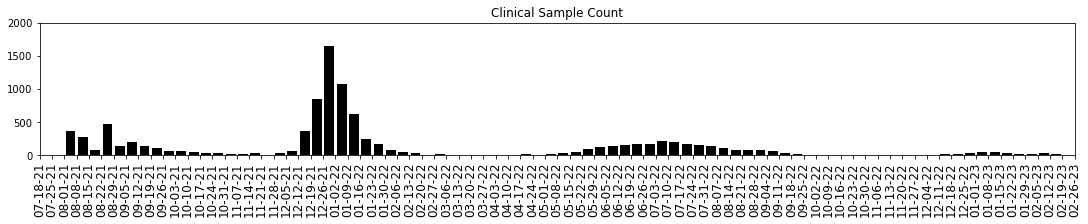

In [40]:
import matplotlib.pyplot as plt
import numpy as np

fontsize = 14
fig, ax  = plt.subplots(1, 1, figsize=(15, 3), sharex=True, constrained_layout=True)

x = np.arange(len(sample_counts))

ax.bar(x, sample_counts, color='black', alpha=1, width=0.8)

ax.set_ylim(0,2000)
ax.set_xlim(-0.5,len(sample_counts)-0.5)
ax.set_xticks(np.arange(len(sample_counts)+1)-0.5)
ax.set_xticklabels(x_ticklabels, rotation=90, fontsize=12)

ax.set_title('Clinical Sample Count')

In [11]:
sampling_date_start = pd.to_datetime('12/06/2021')
weekdays = timedelta(days=7)
sampling_date_end = sampling_date_start + 8 * weekdays

In [12]:
sampling_date_end

Timestamp('2022-01-31 00:00:00')

In [13]:
filtered_metadata = filtered_metadata[(filtered_metadata['Collection_Date'] >= sampling_date_start) & (filtered_metadata['Collection_Date'] < sampling_date_end)]
filtered_metadata

,Assay Type,AvgSpotLen,Bases,BioProject,BioSample,BioSampleModel,Bytes,Center Name,Collection_Date,Consent,...,raw_sequence_data_processing_method (run),ReleaseDate,create_date,version,Sample Name,SRA Study,collected_by,Host_age,amplicon__PCR_primer_scheme (run),host_sex
Run,,,,,,,,,,,,,,,,,,,,,
SRR17385361,WGS,146,315053090,PRJNA764181,SAMN24526781,SARS-CoV-2: clinical or host-associated,142251355,DISEASE PREVENTION AND CONTROL,2021-12-14,public,...,BWA Version: 0.7.17-r1188; iVar version 1.2.2,2021-12-30T00:00:00Z,2022-04-21T00:11:00Z,2,TX-HHD-2112218594,SRP337649,"FBCCHS - COVID Testing - 4520 READING ROAD\, S...",34.0,NaN,female
SRR17385362,WGS,152,281371912,PRJNA764181,SAMN24526601,SARS-CoV-2: clinical or host-associated,127877961,DISEASE PREVENTION AND CONTROL,2021-12-14,public,...,BWA Version: 0.7.17-r1188; iVar version 1.2.2,2021-12-30T00:00:00Z,2022-04-21T00:11:00Z,2,TX-HHD-2112208136,SRP337649,NaN,70.0,NaN,NaN
SRR17385363,WGS,152,154251120,PRJNA764181,SAMN24526583,SARS-CoV-2: clinical or host-associated,72785188,DISEASE PREVENTION AND CONTROL,2021-12-15,public,...,BWA Version: 0.7.17-r1188; iVar version 1.2.2,2021-12-30T00:00:00Z,2022-04-21T00:11:00Z,2,TX-HHD-2112200163,SRP337649,"FBCCHS - COVID Testing - 4520 READING ROAD\, S...",31.0,NaN,female
SRR17385364,WGS,146,222184820,PRJNA764181,SAMN24526780,SARS-CoV-2: clinical or host-associated,99844851,DISEASE PREVENTION AND CONTROL,2021-12-14,public,...,BWA Version: 0.7.17-r1188; iVar version 1.2.2,2021-12-30T00:00:00Z,2022-04-21T00:11:00Z,2,TX-HHD-2112218591,SRP337649,"FBCCHS - COVID Testing - 4520 READING ROAD\, S...",68.0,NaN,female
SRR17385365,WGS,146,315530318,PRJNA764181,SAMN24526779,SARS-CoV-2: clinical or host-associated,143143883,DISEASE PREVENTION AND CONTROL,2021-12-14,public,...,BWA Version: 0.7.17-r1188; iVar version 1.2.2,2021-12-30T00:00:00Z,2022-04-21T00:11:00Z,2,TX-HHD-2112218520,SRP337649,CAMBRIDGE HEALTH AND REHAB - 1106 GOLFVIEW DRIVE,53.0,NaN,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR18133353,WGS,148,362853376,PRJNA764181,SAMN26233067,SARS-CoV-2: clinical or host-associated,152487576,DISEASE PREVENTION AND CONTROL,2021-12-22,public,...,BWA Version: 0.7.17-r1188; iVar version 1.2.2,2022-02-24T00:00:00Z,2022-04-21T00:23:00Z,2,TX-HHD-2201056720,SRP337649,"GALE\, LETOSHA",61.0,VarSkip,NaN
SRR18133354,WGS,602,253916978,PRJNA764181,SAMN26232815,SARS-CoV-2: clinical or host-associated,173718018,DISEASE PREVENTION AND CONTROL,2021-12-23,public,...,BWA Version: 0.7.17-r1188; iVar version 1.2.2,2022-02-24T00:00:00Z,2022-04-21T00:23:00Z,2,TX-HHD-2201141431,SRP337649,"GALE\, LETOSHA",9.0,VarSkip,NaN
SRR18133355,WGS,148,195528424,PRJNA764181,SAMN26233066,SARS-CoV-2: clinical or host-associated,80031811,DISEASE PREVENTION AND CONTROL,2021-12-22,public,...,BWA Version: 0.7.17-r1188; iVar version 1.2.2,2022-02-24T00:00:00Z,2022-04-21T00:22:00Z,2,TX-HHD-2201056655,SRP337649,"GALE\, LETOSHA",71.0,VarSkip,NaN


In [14]:
filtered_metadata.columns

Index(['Assay Type', 'AvgSpotLen', 'Bases', 'BioProject', 'BioSample',
       'BioSampleModel', 'Bytes', 'Center Name', 'Collection_Date', 'Consent',
       'DATASTORE filetype', 'DATASTORE provider', 'DATASTORE region',
       'dehosting_method (run)', 'Experiment', 'geo_loc_name_country',
       'geo_loc_name_country_continent', 'geo_loc_name', 'GISAID_virus_name',
       'Host_disease', 'HOST', 'Instrument', 'Isolate', 'Isolation_source',
       'Library Name', 'LibraryLayout', 'LibrarySelection', 'LibrarySource',
       'Organism', 'Platform', 'purpose_of_sequencing',
       'raw_sequence_data_processing_method (run)', 'ReleaseDate',
       'create_date', 'version', 'Sample Name', 'SRA Study', 'collected_by',
       'Host_age', 'amplicon__PCR_primer_scheme (run)', 'host_sex'],
      dtype='object')

In [15]:
filtered_metadata['collected_by'].unique()

array(['FBCCHS - COVID Testing - 4520 READING ROAD\\, SUITE A-200', nan,
       'CAMBRIDGE HEALTH AND REHAB - 1106 GOLFVIEW DRIVE',
       'HARRIS CO. JUV. DET. CTR. - 1200 CONGRESS',
       'PARK MANOR WESTCHASE - 11910 RICHMOND AVE',
       'BRAZOS TOWERS BAYOU MANOR - 4141 S BRAESWOOD',
       'HCO INST FORENSIC SCI - 1861 OLD SPANISH TRAIL',
       "MAYOR'S OFFICE - 8000 NORTH STADIUM DRIVE",
       'ACRES HOME MSC - 6719 W MONTGOMERY RD',
       'HIRAM CLARKE MSC - 3810 W FUQUA ST',
       'MEMORIAL HERMANN - 6411 FANNIN', 'TSU - 3100 CLEBURNE ST.',
       'SOUTHWEST MSC- 6400 HIGH STAR DRIVE',
       'SEVEN ACRES JEWISH - 6200 N BRAESWOOD BLVD',
       'WINDSOR HOUSTON- 6920 T C Jester Blvd',
       'NORTH HOUSTON - 9814 GRANT RD',
       'MAGNOLIA HEALTH CENTER - 7037 CAPITOL',
       'FORT BEND JUVENILE - 122 GOLFVIEW', 'GALE\\, LETOSHA',
       'BROOKDALE WILLOWBROOKE - 13500 BRETON RIDGE ST',
       'MEMORIAL CITY HEALTH- 1341 BLALOCK RD',
       'THE HALLMARK - 4718 HALLMARK

In [16]:
for i in range(0, 8):
    start = sampling_date_start + i*weekdays
    end = sampling_date_start + (i+1)*weekdays
    
    weekly_sample_count = filtered_metadata[(filtered_metadata['Collection_Date'] >= start) & (filtered_metadata['Collection_Date'] < end)].shape[0]
    print(start, end, weekly_sample_count)

2021-12-06 00:00:00 2021-12-13 00:00:00 64
2021-12-13 00:00:00 2021-12-20 00:00:00 365
2021-12-20 00:00:00 2021-12-27 00:00:00 853
2021-12-27 00:00:00 2022-01-03 00:00:00 1657
2022-01-03 00:00:00 2022-01-10 00:00:00 1081
2022-01-10 00:00:00 2022-01-17 00:00:00 628
2022-01-17 00:00:00 2022-01-24 00:00:00 248
2022-01-24 00:00:00 2022-01-31 00:00:00 164


In [17]:
# for i, sra_id in enumerate(filtered_metadata.index.to_list()):
#     with open(os.path.join(f"/home/Users/yl181/cdc_harvest_variants/Proposed_Pipeline_SRA_Inputs_Quarc", f"hv_job_{i}.in"), "w") as array_out:
#         array_out.write(sra_id)

In [20]:
with open("houston_sampled_sra.txt", 'w') as output_f:
    for sra_id in filtered_metadata.index.to_list():
        output_f.write(f"{sra_id}\n")

In [21]:
#filtered_metadata.to_csv('PRJNA764181.filtered.csv')

In [18]:
filtered_metadata

,Assay Type,AvgSpotLen,Bases,BioProject,BioSample,BioSampleModel,Bytes,Center Name,Collection_Date,Consent,...,raw_sequence_data_processing_method (run),ReleaseDate,create_date,version,Sample Name,SRA Study,collected_by,Host_age,amplicon__PCR_primer_scheme (run),host_sex
Run,,,,,,,,,,,,,,,,,,,,,
SRR17385361,WGS,146,315053090,PRJNA764181,SAMN24526781,SARS-CoV-2: clinical or host-associated,142251355,DISEASE PREVENTION AND CONTROL,2021-12-14,public,...,BWA Version: 0.7.17-r1188; iVar version 1.2.2,2021-12-30T00:00:00Z,2022-04-21T00:11:00Z,2,TX-HHD-2112218594,SRP337649,"FBCCHS - COVID Testing - 4520 READING ROAD\, S...",34.0,NaN,female
SRR17385362,WGS,152,281371912,PRJNA764181,SAMN24526601,SARS-CoV-2: clinical or host-associated,127877961,DISEASE PREVENTION AND CONTROL,2021-12-14,public,...,BWA Version: 0.7.17-r1188; iVar version 1.2.2,2021-12-30T00:00:00Z,2022-04-21T00:11:00Z,2,TX-HHD-2112208136,SRP337649,NaN,70.0,NaN,NaN
SRR17385363,WGS,152,154251120,PRJNA764181,SAMN24526583,SARS-CoV-2: clinical or host-associated,72785188,DISEASE PREVENTION AND CONTROL,2021-12-15,public,...,BWA Version: 0.7.17-r1188; iVar version 1.2.2,2021-12-30T00:00:00Z,2022-04-21T00:11:00Z,2,TX-HHD-2112200163,SRP337649,"FBCCHS - COVID Testing - 4520 READING ROAD\, S...",31.0,NaN,female
SRR17385364,WGS,146,222184820,PRJNA764181,SAMN24526780,SARS-CoV-2: clinical or host-associated,99844851,DISEASE PREVENTION AND CONTROL,2021-12-14,public,...,BWA Version: 0.7.17-r1188; iVar version 1.2.2,2021-12-30T00:00:00Z,2022-04-21T00:11:00Z,2,TX-HHD-2112218591,SRP337649,"FBCCHS - COVID Testing - 4520 READING ROAD\, S...",68.0,NaN,female
SRR17385365,WGS,146,315530318,PRJNA764181,SAMN24526779,SARS-CoV-2: clinical or host-associated,143143883,DISEASE PREVENTION AND CONTROL,2021-12-14,public,...,BWA Version: 0.7.17-r1188; iVar version 1.2.2,2021-12-30T00:00:00Z,2022-04-21T00:11:00Z,2,TX-HHD-2112218520,SRP337649,CAMBRIDGE HEALTH AND REHAB - 1106 GOLFVIEW DRIVE,53.0,NaN,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR18133353,WGS,148,362853376,PRJNA764181,SAMN26233067,SARS-CoV-2: clinical or host-associated,152487576,DISEASE PREVENTION AND CONTROL,2021-12-22,public,...,BWA Version: 0.7.17-r1188; iVar version 1.2.2,2022-02-24T00:00:00Z,2022-04-21T00:23:00Z,2,TX-HHD-2201056720,SRP337649,"GALE\, LETOSHA",61.0,VarSkip,NaN
SRR18133354,WGS,602,253916978,PRJNA764181,SAMN26232815,SARS-CoV-2: clinical or host-associated,173718018,DISEASE PREVENTION AND CONTROL,2021-12-23,public,...,BWA Version: 0.7.17-r1188; iVar version 1.2.2,2022-02-24T00:00:00Z,2022-04-21T00:23:00Z,2,TX-HHD-2201141431,SRP337649,"GALE\, LETOSHA",9.0,VarSkip,NaN
SRR18133355,WGS,148,195528424,PRJNA764181,SAMN26233066,SARS-CoV-2: clinical or host-associated,80031811,DISEASE PREVENTION AND CONTROL,2021-12-22,public,...,BWA Version: 0.7.17-r1188; iVar version 1.2.2,2022-02-24T00:00:00Z,2022-04-21T00:22:00Z,2,TX-HHD-2201056655,SRP337649,"GALE\, LETOSHA",71.0,VarSkip,NaN


In [22]:
output_dir = '/home/Users/yl181/cdc_harvest_variants/Proposed_Pipeline_SRA_Outputs_Quarc'

In [68]:
count = 0
for i in range(5060):
    if os.path.exists(f"{output_dir}/{i}_out/cryptic_bam_files"):
        count += 1

In [69]:
count

5050